In [1]:
import pandas as pd
df = pd.read_excel('/content/iris (1).xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.fillna(df.mean(numeric_only=True), inplace=True)

X = df[['SL', 'SW', 'PL', 'PW']]
y = df['Classification']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Missing values handled, features and target separated, target encoded, and data split.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

Missing values handled, features and target separated, target encoded, and data split.
X_train shape: (120, 4), X_test shape: (30, 4)
y_train shape: (120,), y_test shape: (30,)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42, max_iter=200)),
    ('SVC', SVC(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('KNeighbors', KNeighborsClassifier())
]

results = {}

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

print("Model Performance Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")

Model Performance Results:

RandomForest:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

LogisticRegression:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

SVC:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

DecisionTree:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

KNeighbors:
  Accuracy: 0.9667
  Precision: 0.9694
  Recall: 0.9667
  F1-Score: 0.9664


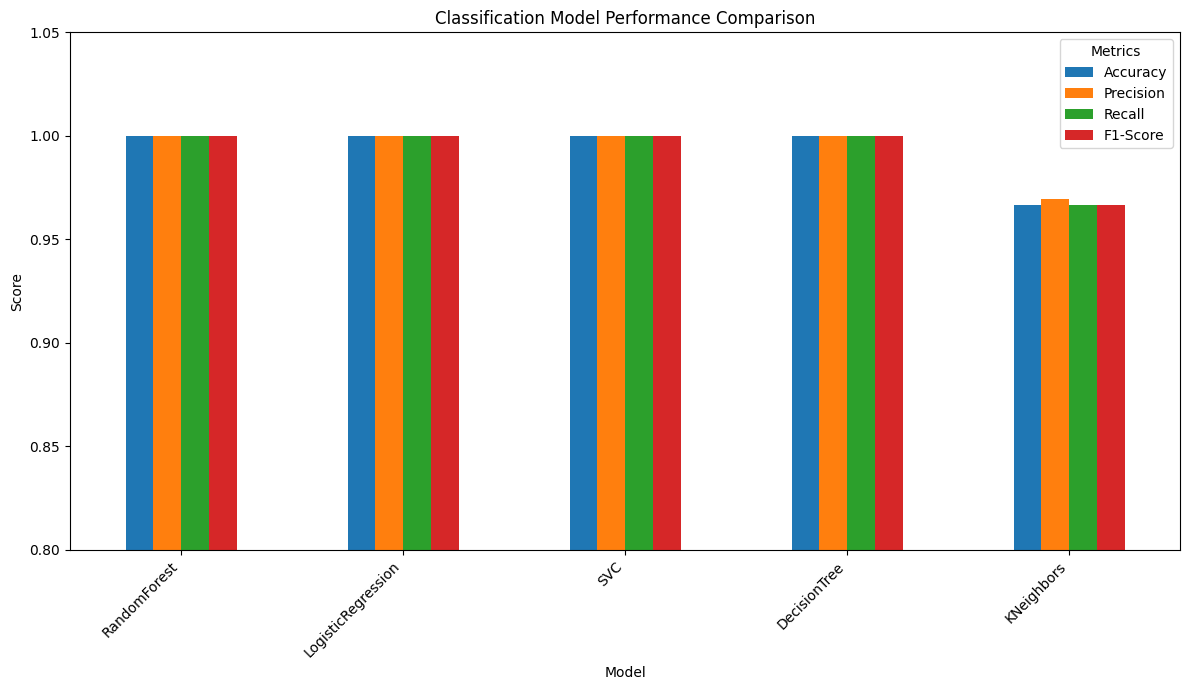

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame(results).T

results_df.plot(kind='bar', figsize=(12, 7))
plt.title('Classification Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.8, 1.05) # Adjust y-axis limit to better visualize differences
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()
